### 1. 목표
- 타이타닉 데이터를 활용하여 생존자 예측 모델을 만들어보자 
- kaggle 경진대회에서 높은 점수를 달성해보자 
- 머신러닝의 전체과정을 이해해보자 

### 2. 데이터 수집

- kaggle 에서 제공해주는 데이터 불러오기 

In [265]:
# 라이브러리 불러오기

# 수치계산용 라이브러리
import numpy as np

# 행과 열을 가지는 표와 같은 형태를 다루는 라이브러리
import pandas as pd

# 시각화 라이브러리
import matplotlib.pyplot as plt

# 시각화 라이브러리 -> pandas와 호환성이 높음
import seaborn as sns

In [266]:
!pip list

'pip'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [267]:
# train, test 
# 조건 : PassengerId 컬럼을 인덱스로 변경하여 불러오기 

train = pd.read_csv('./data/train.csv', index_col='PassengerId')
test = pd.read_csv('./data/test.csv', index_col='PassengerId')

In [268]:
# 데이터 크기 확인

print(train.shape, test.shape)

# train : 10개 특성, 1개 정답 
# test : 10개 특성

(891, 11) (418, 10)


In [269]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [270]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [271]:
# train 정보 확인
train.info()
# info 에서는 1. 결측치 여부 2. 데이터 타입을 확인함 

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [272]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


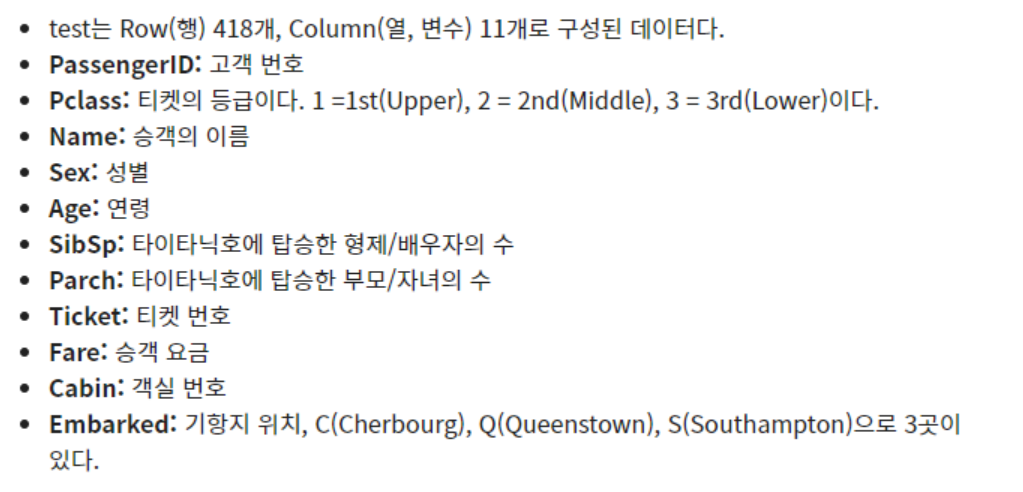

### 3. 데이터 전처리

#### 결측치 여부 확인
- train
  - Age
  - Cabin
  - Embarked
- test
  - Age
  - Fare
  - Cabin

=> 단순 기술통계량으로 결측치를 채우지 않고, 각 컬럼 간의 상관관계를 파악하며 결측치 채우기

- train -> Age 결측치 채우기
  - 나이 데이터는 주로 평균값으로 결측치를 채움 
  - 기술 통계량을 확인해 보았을 때, 전체적인 나이가 앞쪽으로 치우처져있는 것을 확인
    - => 모델의 신뢰성이 낮아질 수 있음
  - 따라서, 다른 컬럼들과의 상관관계를 확인하여 결측치를 상세하게 채워보자!

In [273]:
# train의 Age 컬럼 확인
train['Age'].mean()

29.69911764705882

In [274]:
# 나이 데이터의 기술통계량 확인
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

중위값과 4분위수를 함께 파악했을 때, max 값은 80이지만 75%에서도 38세에 불과 


=> 연령층이 어린 나이로 몰려있음

- 절대값으로 1에 가까울수록 상관관계가 높음
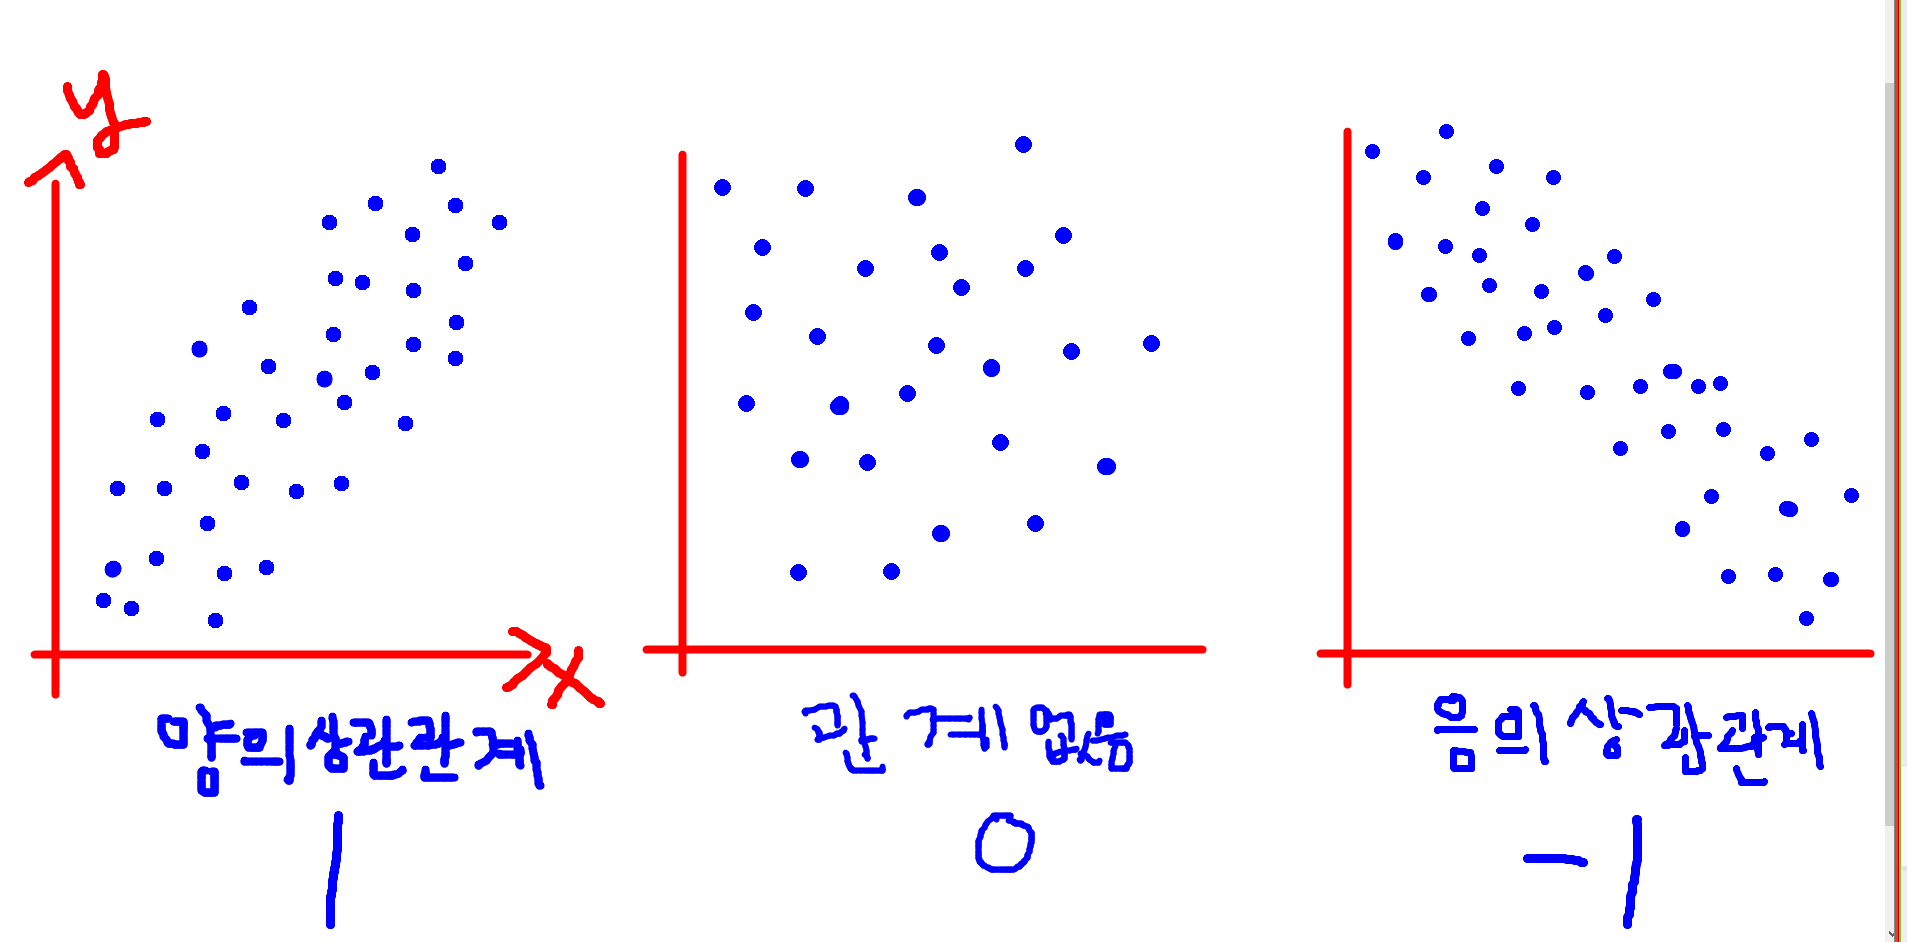

In [275]:
train.corr(numeric_only=True)
# 상관관계수란? -1 ~ 1 사이의 값을 가지며, 절대값이 1에 가까울 수록 높은 상관관계를 가진다. 0에 가까울수록 관계가 없음을 의미한다
#Age 컬럼과 상관관계가 높은 Pclass 컬럼을 활용

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [276]:
 # 피봇 테이블 : 컬럼들 간의 요약된 정보를 출력할 수 있는 테이블 형태의 데이터 
 # Age 평균값을 구할 건데 , Pclass, Sex에 따른 평균값을 구할 것! 
pt1 = train.pivot_table(values='Age', # 데이터로 사용될 컬럼
                  index=['Pclass','Sex'], # 데이터 요약 시 사용할 컬럼 
                  aggfunc='mean')  # 그룹별로 조회할 함수(sum, mean, count)

In [277]:
pt1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [278]:
# 다중인덱싱/멀티인덱싱 => 두 개 이상의 인덱스가 있을 때 값 가져오는 방법 : df.loc([(앞 인덱스, 뒤 인덱스), 컬럼명])

# 1등급 여자의 나이 인덱싱하기
pt1.loc[(1,'female'), 'Age']

34.61176470588235

In [279]:
# 2등급 남자의 나이 인덱싱하기
pt1.loc[(2,'male'), 'Age']

30.74070707070707

In [280]:
# 3등급 여자의 나이 인덱싱하기
pt1.loc[(3, 'female'), 'Age']

21.75

In [281]:
# 결측치 채우기 
# 나이 결측치를 출력해주는 기능 함수화 

def fill_age(data):
    if pd.isna(data['Age']): # Age 컬럼에 결측치가 있다면? 
        return pt1.loc[(data['Pclass'], data['Sex']), 'Age'] # Pclass와 Sex에 맞는 나이값을 출력해주는 코드
    else : # 결측치가 없다면?
        return data['Age'] # 원래 'Age' 컬럼에 있는 값을 출력 

In [282]:
# apply 함수 : DataFrame 에 함수를 적용하기 위해 사용
# DataFrame.apply(함수명, 축설정)

In [283]:
# train의 Age 컬럼에 위의 함수를 통해 출력된 값으로 업데이트
train['Age'] = train.apply(fill_age, axis=1).astype('int64') 

In [284]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


- test => Age 컬럼 결측치 채우기 

In [285]:
test['Age'] = test.apply(fill_age, axis=1).astype('int64')

In [286]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


- train -> Embarked 컬럼 결측치 채우기

In [287]:
train.info()
# train Embarked 컬럼의 결측치는 단 2개 

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [288]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [289]:
train['Embarked'].count()

889

In [290]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [291]:
# 결측치가 2개 뿐이고, S 데이터가 압도적으로 많기 때문에 
# 결측치를 S 항구로 채워주기
# 데이터가 많으면 많을수록 한두개의 데이터는 큰영향을 끼치지 않음 


In [292]:
# test 데이터도 확인
test['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [293]:
# 결측치를 내가 원하는 값으로 채워주는 함수 
# 채워주고 싶은 df.fillna(값)
train['Embarked'] = train['Embarked'].fillna('S')

In [294]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


Embarked 컬럼 결측치 채우기 완료 !! 

- test => Fare 요금 결측치 채우기

In [295]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


In [296]:
test['Fare'].describe()
# 평균이 35, 최대값 512 / 앞쪽에 데이터가 몰려있는 것을 확인
# Fare 전체 평균으로 채우기에는 신뢰성이 떨어질 것 같음 

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

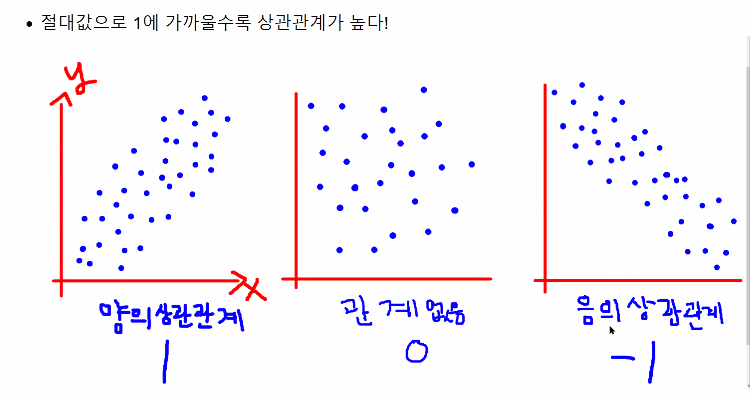

In [297]:
# Fare 컬럼 상관관계 확인
train.corr(numeric_only=True)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.066538,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.410104,0.083081,0.018443,-0.549500
Age,-0.066538,-0.410104,1.000000,-0.251439,-0.178855,0.120173
SibSp,-0.035322,0.083081,-0.251439,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.178855,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.120173,0.159651,0.216225,1.000000


In [298]:
# Fare 컬럼과 관련이 높은 Pclass, Sex 가져와서 결측치 채우기! 
# 피봇 테이블
# Fare 평균값 (Pclass, Sex에 따른) -> pt2 

 # 피봇 테이블 : 컬럼들 간의 요약된 정보를 출력할 수 있는 테이블 형태의 데이터 
 # Fare 평균값을 구할 건데 , Pclass, Sex에 따른 평균값을 구할 것! 
pt2 = test.pivot_table(values='Fare', # 데이터로 사용될 컬럼
                  index=['Pclass','Sex'], # 데이터 요약 시 사용할 컬럼 
                  aggfunc='mean')  # 그룹별로 조회할 함수(sum, mean, count)

In [299]:
pt2

Fare
Pclass Sex               
1      female  115.591168
       male     75.586551
2      female   26.438750
       male     20.184654
3      female   13.735129
       male     11.826350

In [300]:
# 비어있는 값이 1개이기 때문에 함수생성 X
# test에서 결측치가 있는 행을 찾아서 직접 넣기 
# test에서 Fare 컬럼이 비어있는 행 찾아오기 => 조건을 주는 인덱싱, 불리언인덱싱 사용 ! 
# 불리언 인덱싱 : 조건에 맞는 데이터만 추출 => 넘파이에서 사용 가능! 
# 데이터[조건] => 조건이 True인 값만 추출

- 비어있는 값 확인 : isna() 함수

In [301]:
# 불리언 인덱싱 사용해보기
score = [70, 56, 21, 80, 90, 95]
np_score = np.array(score)

In [302]:
# 점수가 80점 이상인 데이터만 출력
np_score >= 80

array([False, False, False,  True,  True,  True])

In [303]:
np_score[np_score>=80]

array([80, 90, 95])

- Fare가 결측치인 값 가져오기

In [304]:
test[test['Fare'].isna()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60,0,0,3701,NaN,NaN,S


- 3등급이면서 남자인 요금 평균 : 11.826350
- Fare에 결측치 채워주기 

In [305]:
test['Fare'] = test['Fare'].fillna(11.826350)

In [306]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


#### 불리언 인덱싱 복습 !!

In [307]:
# 나이가 50세 이상인 데이터 출력
test[test['Age']>=50]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.68750,NaN,Q
905,2,"Howard, Mr. Benjamin",male,63,1,0,24065,26.00000,NaN,S
912,1,"Rothschild, Mr. Martin",male,55,1,0,PC 17603,59.40000,NaN,C
917,3,"Robins, Mr. Alexander A",male,50,1,0,A/5. 3337,14.50000,NaN,S
922,2,"Louch, Mr. Charles Alexander",male,50,1,0,SC/AH 3085,26.00000,NaN,S
940,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60,0,0,11813,76.29170,D15,C
961,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60,1,4,19950,263.00000,C23 C25 C27,S
969,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",female,55,2,0,11770,25.70000,C101,S
973,1,"Straus, Mr. Isidor",male,67,1,0,PC 17483,221.77920,C55 C57,S


In [308]:
# 성별이 여자인 사람 출력 
test[test['Sex']=='female']

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,NaN,S
898,3,"Connolly, Miss. Kate",female,30,0,0,330972,7.6292,NaN,Q
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18,0,0,2657,7.2292,NaN,C
904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23,1,0,21228,82.2667,B45,S
...,...,...,...,...,...,...,...,...,...,...
1301,3,"Peacock, Miss. Treasteall",female,3,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
1302,3,"Naughton, Miss. Hannah",female,21,0,0,365237,7.7500,NaN,Q
1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37,1,0,19928,90.0000,C78,Q


- Cabin 결측치 처리 (train, test 둘 다 결측치가 있다 )

In [309]:
train['Cabin'].count()
# 전체 데이터는 891개 
# 존재하는 데이터 204개 
# 결측치 687개나 됨 !! 
# => 실제 데이터보다 결측치가 더 많음 
# => 컬럼을 삭제하는 것도 하나의 방법 

204

In [310]:
train['Cabin'].unique()
# 유일한 값들을 확인해봤을 때 규칙을 찾기! 
# 알파벳을 활용해보자! => 층수 

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [311]:
# train, test 알파벳으로 데이터를 변경 
# 결측치 = M(mystery)이라는 임의의 알파벳으로 채우기 

train['Deck']  = train['Cabin'].fillna('M')
test['Deck'] = test['Cabin'].fillna('M')

# 임의의 문자로 채워주는 이유? 결측치가 너무 많기 때문에
# 결측치를 가지고 있는 사람들의 패턴을 파악하기 위해 
# 시각화를 통해서 결측치들의 규칙 확인 

- 문자열의 n번째 데이터만 추출하는 함수 : 문자열.str[n]

In [312]:
# 'Deck' 컬럼에는 알파벳만을 담아주기 
train['Deck'] = train['Deck'].str[0]
test['Deck'] = test['Deck'].str[0]

- 원하는 컬럼 삭제 함수 : 테이블.drop(컬럼이름, 축설정)

In [313]:
# Cabin 컬럼 삭제
train.drop('Cabin', axis=1, inplace=True)

In [314]:
test.drop('Cabin', axis=1, inplace=True)

In [315]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [316]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Embarked  418 non-null    object 
 9   Deck      418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


- Deck 컬럼의 M 데이터의 패턴 확인

In [317]:
# 피봇테이블
# Deck 별로 산 사람, 죽은 사람 수를 count

train.pivot_table(values='Name',
                  index=['Deck', 'Survived'],
                  aggfunc='count')

Name
Deck Survived      
A    0            8
     1            7
B    0           12
     1           35
C    0           24
     1           35
D    0            8
     1           25
E    0            8
     1           24
F    0            5
     1            8
G    0            2
     1            2
M    0          481
     1          206
T    0            1

- M 데이터를 가진 사람들은 산 사람보다 죽은 사람의 비율이 높다 ! (약 2배 )

- 시각화로 확인하기

<Axes: xlabel='Deck', ylabel='count'>

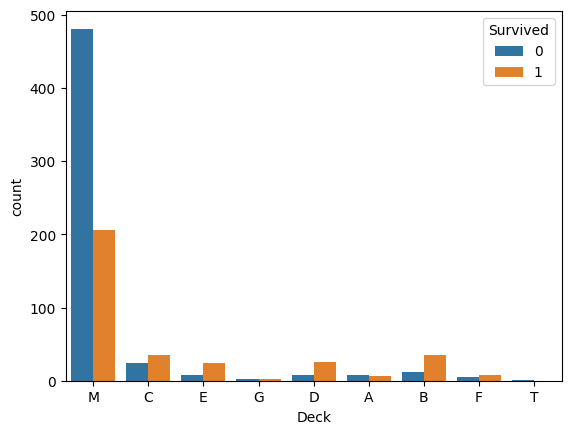

In [318]:
sns.countplot(data=train,
              x= 'Deck',
              hue='Survived')
# M에 죽은사람이 많음
# 생존여부를 파악하는데 활용해도 괜찮겠군! 

<Axes: xlabel='Pclass', ylabel='count'>

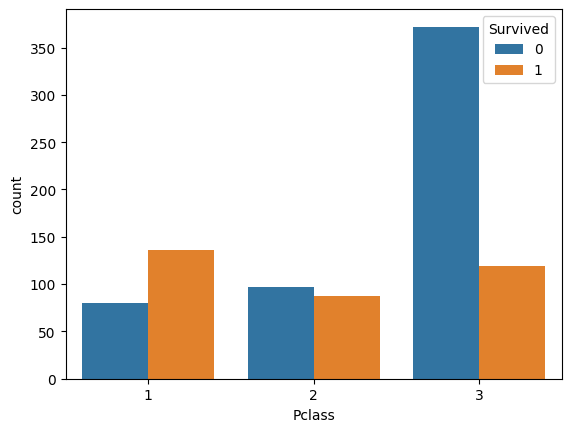

In [319]:
# Pclass에 따른 생존 비율 시각화
sns.countplot(data = train,
              x = 'Pclass',
              hue = 'Survived')

<Axes: xlabel='Deck', ylabel='count'>

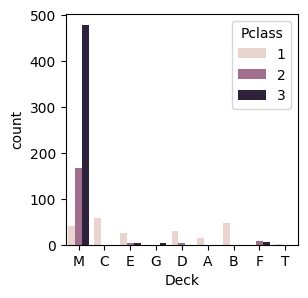

In [320]:
# 그래프 모양 축소
plt.figure(figsize=(3,3))

# x : Deck, hue : Pclass
sns.countplot (data = train, 
               x= 'Deck',
               hue = 'Pclass')



# 1등급은 생존률이 높음.  2등급은 비교적 사망률이 높음,  3등급은 월등히 사망률이 높음

<Axes: xlabel='Embarked', ylabel='count'>

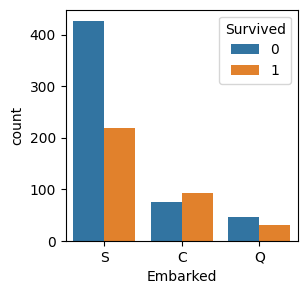

In [321]:
# 탑승 항구에 따른 생존 여부 
plt.figure(figsize=(3,3))

# x : Deck, hue : Pclass
sns.countplot (data = train, 
               x= 'Embarked',
               hue = 'Survived')

# 해석 : S 항구에서 탑승한 경우 사망 확률 up
# 해석 : C 항구에서 답승한 경우 생존 확률 up
# 해석 : Q 항구에서 탑승한 경우 사망 확률 비교적 up 

<Axes: xlabel='Sex', ylabel='count'>

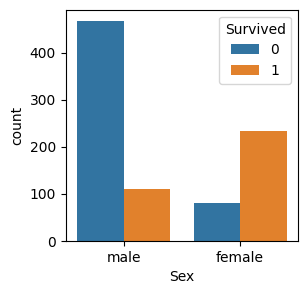

In [322]:
# 성별에 따른 생존여부 

# 탑승 항구에 따른 생존 여부 
plt.figure(figsize=(3,3))

# x : Deck, hue : Pclass
sns.countplot (data = train, 
               x= 'Sex',
               hue = 'Survived')

# 해석 : 남자일수록 사망 확률 up

<Axes: xlabel='Age', ylabel='count'>

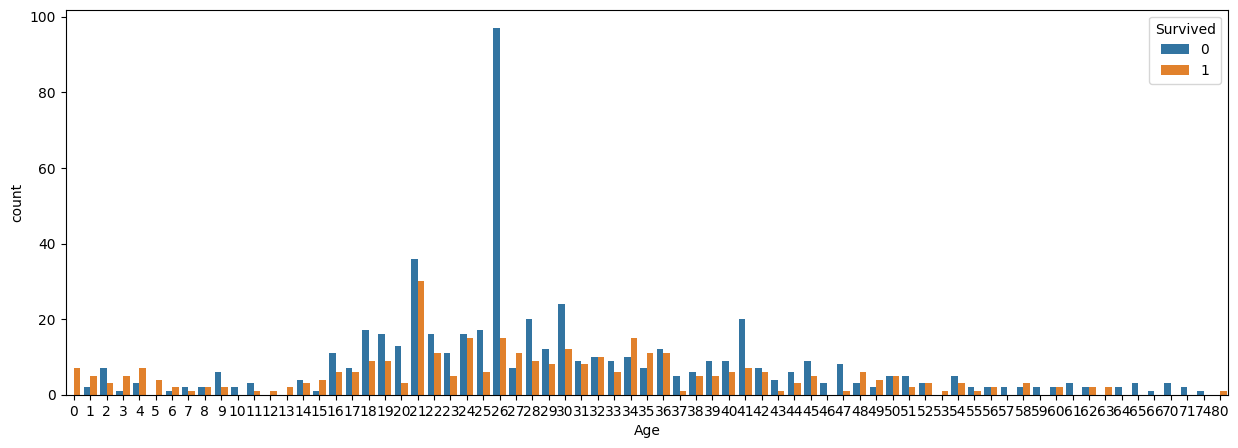

In [323]:
# 나이에 따른 생존여부
plt.figure(figsize=(15,5))

# x : Deck, hue : Pclass
sns.countplot (data = train, 
               x= 'Age',
               hue = 'Survived')

# 연속적인 수치형 데이터를 확인할 때는 막대그래프로 그리면 큰 의미가 없게 된다 
# 수치형의 데이터는 분포, 밀도를 확인할 수 있는 그래프로 표현 

- 바이올린 플롯/그래프(violin plot) : 바이올린 형태로 데이터의 분포와 밀도를 보기 쉽게 곡선으로 표현한 그래프
- 데이터가 많을수록 두껍게 표현, 적을수록 얇게 표현

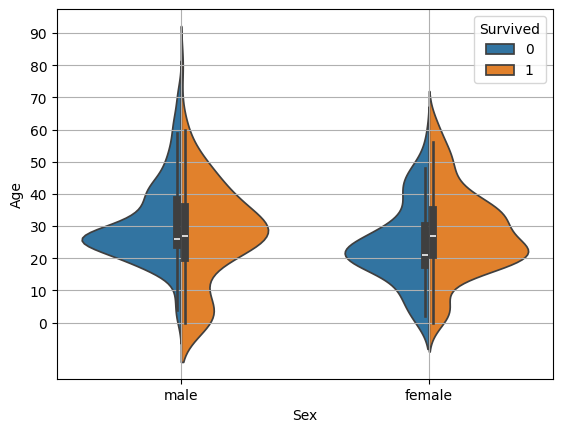

In [324]:
sns.violinplot(data = train, 
               x= 'Sex',
               y = 'Age',
               hue = 'Survived',
               split=True)
plt.yticks(range(0,100,10))
plt.grid()

# 해석 : 20대부터 40대까지의 분포 넒음 => 탑승자가 많음 
# 20대부터 40대 사망자가 많음
# 어린아이들 중에서는 남자아이가 여자아이보다 생존률이 높음 

##### 특성공학 : 새로운 컬럼을 생성, 추출
- Parch : 함께 탑승한 부모, 자식의 수 
- SibSp : 함께 탑승한 형제, 자매, 배우자의 수 
    - 위 두개의 데이터를 보면 동승자 개념 => 비슷한 데이터
    - 부모, 자식, 형제, 자매, 배우자를 합쳐서 '가족의 수' 컬럼을 생성
    - train, test 둘 다 생성

In [325]:
train['Parch']

PassengerId
1      0
2      0
3      0
4      0
5      0
      ..
887    0
888    0
889    2
890    0
891    0
Name: Parch, Length: 891, dtype: int64

In [326]:
train['SibSp']

PassengerId
1      1
2      1
3      0
4      1
5      0
      ..
887    0
888    0
889    1
890    0
891    0
Name: SibSp, Length: 891, dtype: int64

In [327]:
# 두 개의 컬럼을 합해서 가족의 숫자라는 새로운 컬럼을 생성
train['Family_size'] = train['SibSp'] + train['Parch']+ 1 # 1 = 자기자신의 숫자를 더해줌
test['Family_size'] = test['SibSp'] + test['Parch'] + 1 

<Axes: xlabel='Family_size', ylabel='count'>

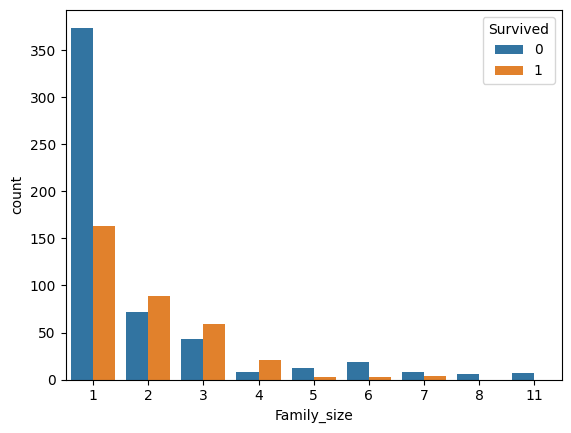

In [328]:
# 시각화 
sns.countplot(data=train,
              x = 'Family_size',
              hue= 'Survived')

# 연속적인 데이터의 겅우, 패턴이 비슷한 데이터들끼리 묶어주어 사소한 관찰의 오류를 줄여주자 => 학습의 효율성을 높여줌 

In [329]:
# 연속형 => 범주화 (binning[비닝])
# 데이터, 범위, 각 범위의 라벨

# 범위(나누는 구간설정): 1, 2~4, 5~11 총 3개의 구간
bins = [0,1,4,11]

# 라벨 
labels = ['alone', 'small', 'large']

train['Family_size'] = pd.cut(train['Family_size'], bins = bins, labels=labels)
test['Family_size'] = pd.cut(test['Family_size'], bins = bins, labels=labels)


<Axes: xlabel='Family_size', ylabel='count'>

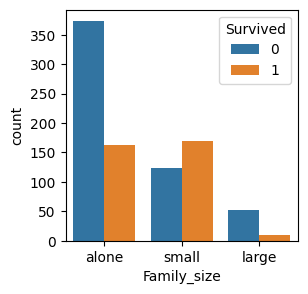

In [330]:
# 그룹화된 Family_size 시각화 
plt.figure(figsize=(3,3))
sns.countplot(data=train,
              x = 'Family_size',
              hue= 'Survived')

# 같은 패턴의 데이터들을 그룹화하여 진행시 사소한 관찰의 오류를 줄일 수 있다 


In [331]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     891 non-null    int64   
 1   Pclass       891 non-null    int64   
 2   Name         891 non-null    object  
 3   Sex          891 non-null    object  
 4   Age          891 non-null    int64   
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Ticket       891 non-null    object  
 8   Fare         891 non-null    float64 
 9   Embarked     891 non-null    object  
 10  Deck         891 non-null    object  
 11  Family_size  891 non-null    category
dtypes: category(1), float64(1), int64(5), object(5)
memory usage: 84.5+ KB


- Name 데이터 확인

In [332]:
train['Name']

# text 데이터 내에서 규칙찾기 

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [333]:
# 첫번째 승객의 이름만 추출해서 확인
train['Name'][1]
# 이름, 호칭, 성 => 호칭 추출 => 문자열.split(기준이 되는 값)

'Braund, Mr. Owen Harris'

In [334]:
train['Name'][1].split(',')[1]

' Mr. Owen Harris'

In [335]:
# .을 기준으로 분할 
train['Name'][1].split(',')[1].split('.')[0]

' Mr'

In [336]:
# 문자열에서 공백 제거 : strip()
train['Name'][1].split(',')[1].split('.')[0].strip()

'Mr'

In [337]:
train['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [338]:
# 위 작업을 함수화 
def split_name(data):
    return data.split(',')[1].split('.')[0].strip()

In [339]:
# Title 새로운 컬럼을 생성 (호칭만을 추출하여 대입)
train['Title'] = train['Name'].apply(split_name)
test['Title'] = test['Name'].apply(split_name)

In [340]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [341]:
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

(0.0, 10.0)

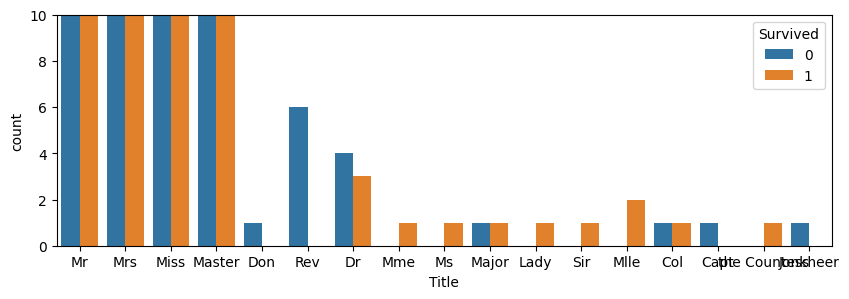

In [342]:
# Title 시각화 
plt.figure(figsize=(10,3))
sns.countplot(data = train, x='Title', hue='Survived')
# 데이터 일부 확대하기 => ylim (y축에 리밋걸기)
plt.ylim(0,10) # 차트 출력 범위 제한
# 개수가 적은 특징들을 others라는 그룹으로 묶어주기
# Rev(목사님) => 특정 패턴을 보임 : 전원 사망 

In [343]:
len(train['Title'].unique())

17

In [344]:
#map 함수 사용을 위해서 각 호칭에 대응하는 딕셔너리를 생성 
title = ['Mr', 'Mrs', 'Miss', 'Master', 'Rev', 'Don', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer']

convert_title = ['Mr', 'Mrs', 'Miss', 'Master', 'Rev'] + ['Other'] * 12


In [345]:
convert_title

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Rev',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other']

In [346]:
title_dic = dict(zip(title,convert_title))
# zip() 함수를 사용해서 2개의 리스트형태 데이터를 연결하여 딕셔너리로 생성 
# zip() : 지퍼처럼 두개의 그룹 데이터를 서로 엮어주는 함수

In [347]:
# map() 함수를 사용하여 key 값에 대응하는 value 값으로 변경 
train['Title'] = train['Title'].map(title_dic)

In [348]:
# 잘바뀌었는지 확인
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Rev'], dtype=object)

In [349]:
len(test['Title'].unique())

9

In [350]:
# test 변경 
title_test = ['Mr', 'Mrs', 'Miss', 'Master','Rev', 'Ms',  'Col', 'Dr', 'Dona']
convert_title_test = ['Mr', 'Mrs', 'Miss', 'Master', 'Rev'] + ['Other'] * 4

In [351]:
convert_title_test

['Mr', 'Mrs', 'Miss', 'Master', 'Rev', 'Other', 'Other', 'Other', 'Other']

In [352]:
title_test_dic = dict(zip(title_test,convert_title_test))
# zip() 함수를 사용해서 2개의 리스트형태 데이터를 연결하여 딕셔너리로 생성 
# zip() : 지퍼처럼 두개의 그룹 데이터를 서로 엮어주는 함수

In [353]:
test['Title'] = test['Title'].map(title_test_dic)

In [354]:
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Rev'], dtype=object)

In [355]:
test['Title']

PassengerId
892         Mr
893        Mrs
894         Mr
895         Mr
896        Mrs
         ...  
1305        Mr
1306     Other
1307        Mr
1308        Mr
1309    Master
Name: Title, Length: 418, dtype: object

In [249]:
# 다른 방식의 풀이 
# train에는 없지만 test에는 존재하는 호칭이 있음
title_train = title 
title_test = ['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Rev', 'Col', 'Dr', 'Dona']

In [250]:
# test에는 있지만 train에는 없는 호칭 찾기 
set(title_test) - set(title_train)
# 'Dona'

{'Dona'}

In [251]:
# train에는 있지만 test에는 없는 호칭
set(title_train) - set(title_test)

{'Capt',
 'Don',
 'Jonkheer',
 'Lady',
 'Major',
 'Mlle',
 'Mme',
 'Sir',
 'the Countess'}

In [252]:
title_dic['Dona'] = 'Other'

In [253]:
test['Title'].map(title_dic)

PassengerId
892         Mr
893        Mrs
894         Mr
895         Mr
896        Mrs
         ...  
1305        Mr
1306     Other
1307        Mr
1308        Mr
1309    Master
Name: Title, Length: 418, dtype: object

In [254]:
test['Title'] = test['Title'].fillna('Other')

<Axes: xlabel='Title', ylabel='count'>

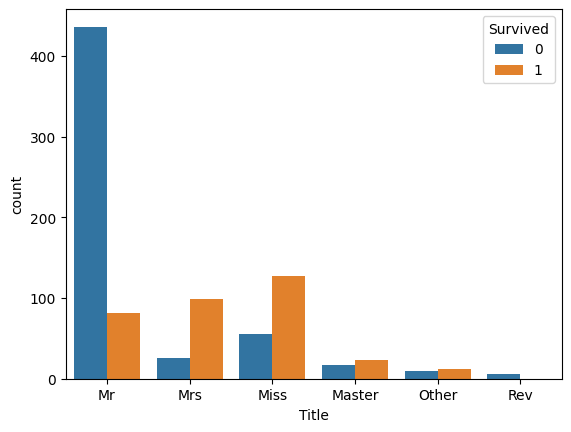

In [356]:
sns.countplot(data=train, x='Title', hue='Survived')

In [357]:
# Ticket 컬럼 확인

train['Ticket'].unique()

# 티켓번호 => 규칙찾기 실패 => 컬럼 제거 

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

##### 필요없는 컬럼 삭제 
- Name, SibSp, Parch, Ticket

In [358]:
train.drop(['Name', 'SibSp', 'Parch', 'Ticket'], axis=1, inplace=True)
test.drop(['Name', 'SibSp', 'Parch', 'Ticket'], axis=1, inplace=True)

In [359]:
# 데이터 크기 확인
print(train.shape)
print(test.shape)

(891, 9)
(418, 8)


### 모델링 
- 데이터분리
- 모델 선택
- 모델 학습
- 모델 예측 
- 모델 평가

- 데이터 분리 
  - train -> 문제, 정답
    - 문제 데이터 [X_train] : 특성 8개 
    - 정답 데이터 [y_train] : Survived 컬럼 
  - test -> 문제 
  - - [X_test]

In [360]:
# 분리
X_train = train.drop('Survived', axis = 1)
y_train = train['Survived']
X_test = test

In [361]:
# 크기 확인
print(X_train.shape, y_train.shape)
print(X_test.shape)

(891, 8) (891,)
(418, 8)


In [362]:
X_train.info()
# object 형태 데이터 => 인코딩 

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Pclass       891 non-null    int64   
 1   Sex          891 non-null    object  
 2   Age          891 non-null    int64   
 3   Fare         891 non-null    float64 
 4   Embarked     891 non-null    object  
 5   Deck         891 non-null    object  
 6   Family_size  891 non-null    category
 7   Title        891 non-null    object  
dtypes: category(1), float64(1), int64(2), object(4)
memory usage: 89.0+ KB


In [363]:
# 원핫인코딩 
# (train, test)
onehot_X_train = pd.get_dummies(X_train)
onehot_X_test = pd.get_dummies(X_test)

In [364]:
# 크기확인
print(onehot_X_train.shape)
print(onehot_X_test.shape)

(891, 26)
(418, 25)


In [367]:
# set() 함수를 활용하여 다른 컬럼을 확인
set(onehot_X_train.columns) - set(onehot_X_test.columns)

{'Deck_T'}

In [368]:
onehot_X_train['Deck_T']
# Deck_T 컬럼이 train에만 존재하는 것을 확인 
# train['Deck'] 컬럼에만 존재하는 T라는 알파벳이 있었기 때문 

PassengerId
1      False
2      False
3      False
4      False
5      False
       ...  
887    False
888    False
889    False
890    False
891    False
Name: Deck_T, Length: 891, dtype: bool